# I Logistic regression

## Topics

(2 hours 45 min):<br>
<code>**1: Logistic regression as an artificial neuron**</code><br>
<code>**2: Negative log-likelihood loss**</code><br>
<code>**3: Logistic regression learning rule**</code><br>
<code>**4: Logist and cross entropy**</code><br>
<code>**5: Code example**</code><br>
<code>**6: Softmax regession**</code><br>
<code>**7: OneHot encoding and multi-category cross entropy**</code><br>
<code>**5: Softmax regression learning rule**</code><br>
<code>**9: Code example**</code>

Thinking about Logistic regression as a single layer neural network helps to understand the basic concept of a forward and a backward pass. Later on we will generelize this concept from binary classification to multiple classificiation. Later on there will be more multiclass stuff going on because in real world scenarios we have more thant two classes. So we will talk about logistic regression as a binarry classifier and then multinomial logistic regression also know as softmax regression. That will be a good started for then understanding multilayer perceptrons which is the topic for the next lectures. 

### Recap

- Solved convergence issue of perceptron via adaline
- Conceptualized gradient descent via computation graphs

To recap what we done in the previous lectures we implemented the perceptron that had convergence issues if data classes where not linearly seperable. But we solved that convergence issue by using Adaline which was based on a mean square error loss function and gradient descent. And the last wee we conceptualized gradient descent using computation graphs. So if you recall that is how adaline look like:

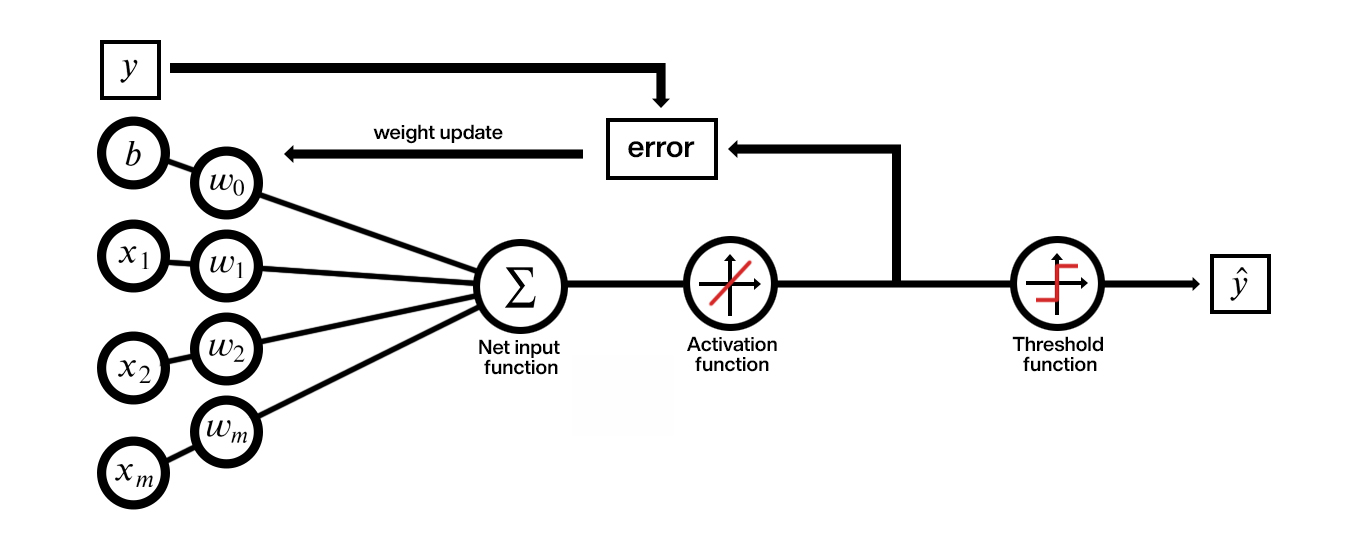

And here is our data set example that could not be easily solved by perceptron meaning that although it comes up with a decision boundary it never converges. Which is tricky to handle in practise because the decision boundary would jump back and forth if we train it with outliers in dataset. And we can never get a perfect classification with 100% accuracy. If we have a linear decision boundary in this case 

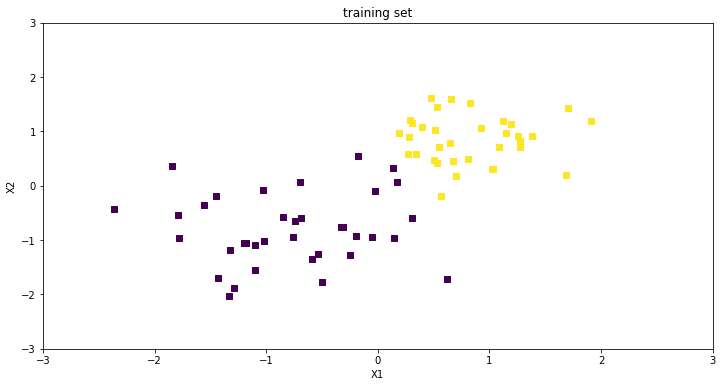

<code>**Part 1: Logistic regression for binary classification**</code>

- We will start discussing logistic regression as artificial neuron basically showing you how logistic regression relates to the concept of adaline. 
- Then I will introduce the loss function of logistic regression which is the negative log likelihood 
- I will show how can we use gradient descent which we talked about before. We will use it to train the logistic regression model.
- Then i will introduce some terminology logits and cross entropy. Threse are some terms you will find a lot in deep learning concepts. It like jargon and we will briefly look what they mean. 
- Then we will move on to coding of these concepts.

<code>**Part 2: Logistic regression for multiclass classification**</code>
- At first of all i will introduce the model
- Later we will need something called OneHot encoding it is just like a format that we can use to represent categorical data. And as well we will go through multicategory cross entropy loss which is the extenction from previous topic about logits and cross entropy.
- Then we will go trough softmax learning rule essentially gradient descent again
- And then we will do some coding exercises

After this we will add a hidden layer to softmax regression model and we will have a multilayer percetron our firs small deep neural network.

## Viewing logistic regression as a single layer neural network

This is why i empasized the identity function in adaline so much. Because if we look at this figure belowe here this is a single layer neural network whee we have the <code>**inputs 𝑥**</code> and <code>**weights 𝑤**</code> and then we compute the net input and then activation. After that we could apply for example a treshold function but for the training we can ignore the threshold function because for training we ussualy use the output from activation. In adaline this activation function was an indetity function. In adaline we usde <code>**mean squared error**</code> as loss function between the computed activation and the true class labels. Now the only difference really between adaline and logistic regression is that we have a different activation function. So one difference is that now we use this <code>**logistic sigmoid function**</code> non linear function instead of identity. And another difference is that we have a different loss function. I will cover the loss function in next section. 

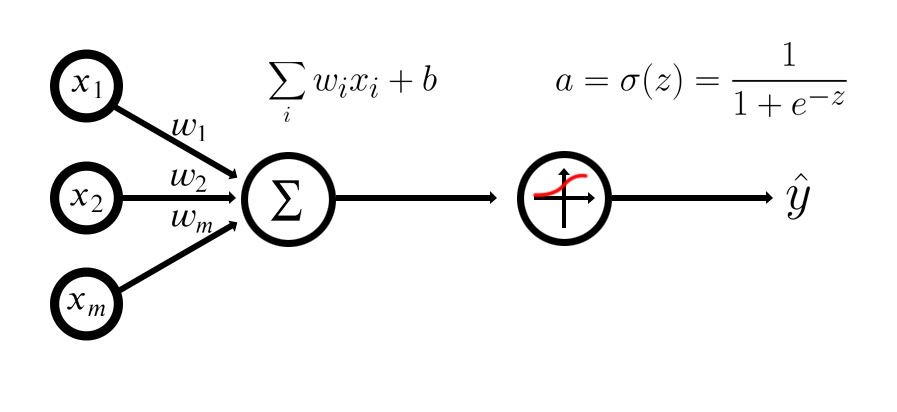

$$ \dfrac{1}{n}\sum_{i}(a^{[i]} - y^{[i]})^2$$

<code>**Main difference from Adaline**</code>
- The activation function in adaline was identity function <code>**𝜎(𝑧)=𝑧**</code>
- Adaline used MSE as loss function <code>**1/n ∑(𝑎[𝑖]−𝑦[𝑖])²**</code>
- We will use a different loss function for <code>**logistic regression**</code>

### Logistic sigmoid function

\begin{multline*}
\sigma(z) = \dfrac{e^{z}}{1 + e^{z}} = \dfrac{1}{1 + e^{-z}}
\end{multline*}

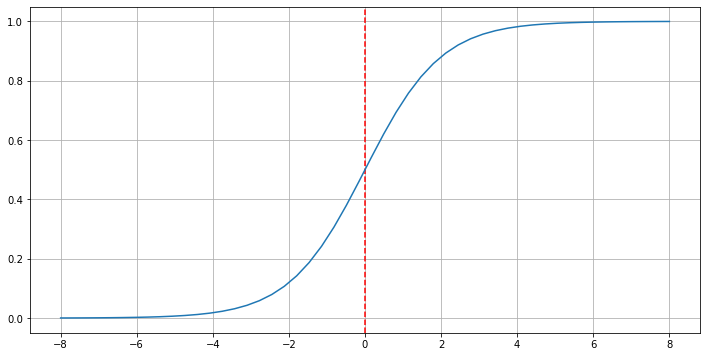

In [22]:
%run ../code_examples/visualize/sigmoid_function.py

We can see that it is center around 0, and it the input z (on x axis) is 0 then the activation output (on y axis) will be 0.5. It saturates at 1 so it aprroaches 1 but never reaches it. It is a function between 0 and 1.

## Logistic regression

To summarize few things that you had to tink a bit about this.  Logistic regression model receives it's input and we have this sigmoid activation function which returns a values between  0 and 1. We can think about this as the model that computes the posterior probability. <code>**Probability of class label y given a feature vector x**</code>.<br>
Let say we have class label from [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) , a simplified case think of it as a binary classification problem where we have setosa species as 1 and versicolor as 0. And if we want to compute the probability that a given feature vector belongs to class 1

\begin{multline*}
P(y = 1|\vec{x}) = h(x)
\end{multline*}

\begin{multline*}
P (y = 0 |\vec{x}) = 1 - h(x)
\end{multline*}

Now image that the probability for class 1 (setosa)

\begin{multline*}
P(y = 1|\vec{x}) = 0.8
\end{multline*}

The the probability for versicolor vould be 

\begin{multline*}
P(y = 0|\vec{x}) = 1 - 0.8 = 0.2
\end{multline*}

And lets assume that the true label is 1. Then it would be pretty could to get this accuracy of 80%. The higher the better, so we want actually have a high probability. But if the true label is 0, then a high probability would be bad. If the true label is 0 what we want is actually a high probability for this case

\begin{multline*}
P (y = 0 |\vec{x}) = 1 - h(x)
\end{multline*}

<code>**Outline**</code>

Given the output:

\begin{multline*}
h(x) = \sigma(w^{\top}x + b)
\end{multline*}

We compute the posterior as:

\begin{multline*}
P(y | x) = 
\begin{Bmatrix}
h(x) & \text{if} \ y = 1 \\
1 - h(x) & \text{if} \ y = 0
\end{Bmatrix}
\end{multline*}

To summarize for a binary classification problem (0 and 1) we want these probabilities to be as  close as possible to respective class
If the true class label is 0 then we want the probability for y being equal to 0 to be close to 1. If the true class label is 1 then we want the probability for y being equalt to 1 to be close to 1 - P (y = 0 |x )
:

\begin{multline*}
P (y = 0 |x ) \approx 1 \ \text{if} \ y = 0
\end{multline*}
\begin{multline*}
P (y = 1 |x ) = 1 - P (y = 0 |x )  \approx 1 \ \text{if} \ y = 1
\end{multline*}



It depends on which probability we want to maximize and that depends on true label here. We will look at that how we can do that with loss function in next section. So the basic setup is that we want high probability given certain classes.